# Libraries

In [38]:
# Import nessesary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings

In [6]:
# Data location
file_location = 'C:/Users/nuke2/Desktop/NW Work/Data/411/Border_Crossing_Entry_Data.csv' # Desktop
# file_location = '' # Laptop

# Data

#### Description of columns

- Port Name (str): This column contains the name of the port from which the border is crossed

- State (str): This column contains the state where the port is located

- Port Code (int): This column contains a unique code for each port

- Border (str): This column contains the name of the border that is being crossed, either US-Canada or US-Mexico

- Date (date/time): This column contains the date on which the border was crossed

- Measure (categorical): This column contains the mode of transportation used to cross the border

- Value (int): This column contains the number of people who crossed the border using the specified mode of transportation

In [36]:
# Load data into notebook
df = pd.read_csv(file_location)

# Change var types
df['Date'] = pd.to_datetime(df['Date'])
df['Measure'] = df['Measure'].astype('category')

# Print head of df
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545


In [39]:
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure            category
Value                 int64
dtype: object

# EDA

In [72]:
df.groupby('Border').agg({'Value': 'sum'})

,Value
Border,
US-Canada Border,2776127401
US-Mexico Border,7337300710


In [40]:
# Check the shape of the DataFrame
print(df.shape)

(355511, 7)


In [41]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64


In [42]:
# Print summary statistics of the DataFrame
print(df.describe())

           Port Code         Value
count  355511.000000  3.555110e+05
mean     2454.009921  2.844758e+04
std      1201.900231  1.518807e+05
min       101.000000  0.000000e+00
25%      2304.000000  0.000000e+00
50%      3013.000000  1.000000e+02
75%      3402.000000  2.597500e+03
max      4105.000000  4.447374e+06


Text(0.5, 1.0, 'Trend of Value over Time by Border')

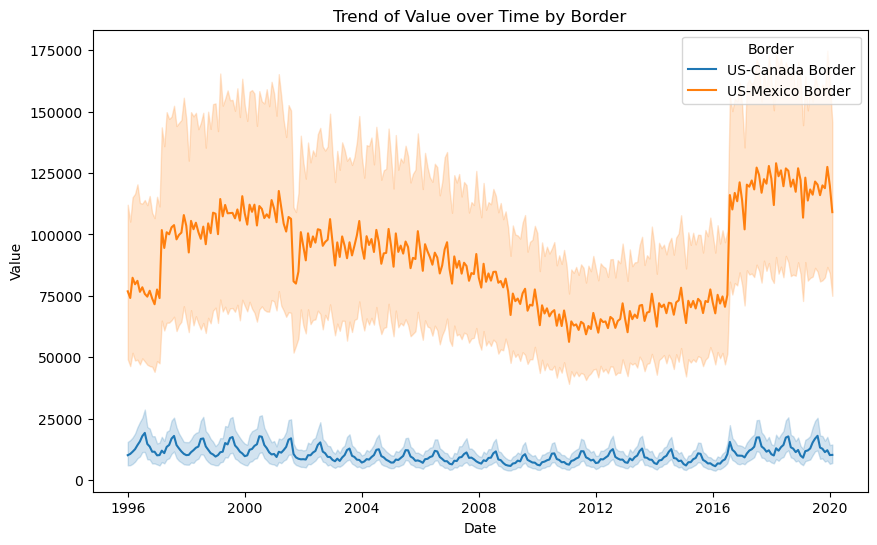

In [44]:
# Create a lineplot to visualize the trend of the 'Value' column over time
plt.subplots(figsize=(10, 6))
sns.lineplot(x='Date', y='Value', data=df, hue='Border')
plt.title('Trend of Value over Time by Border')
plt.show()

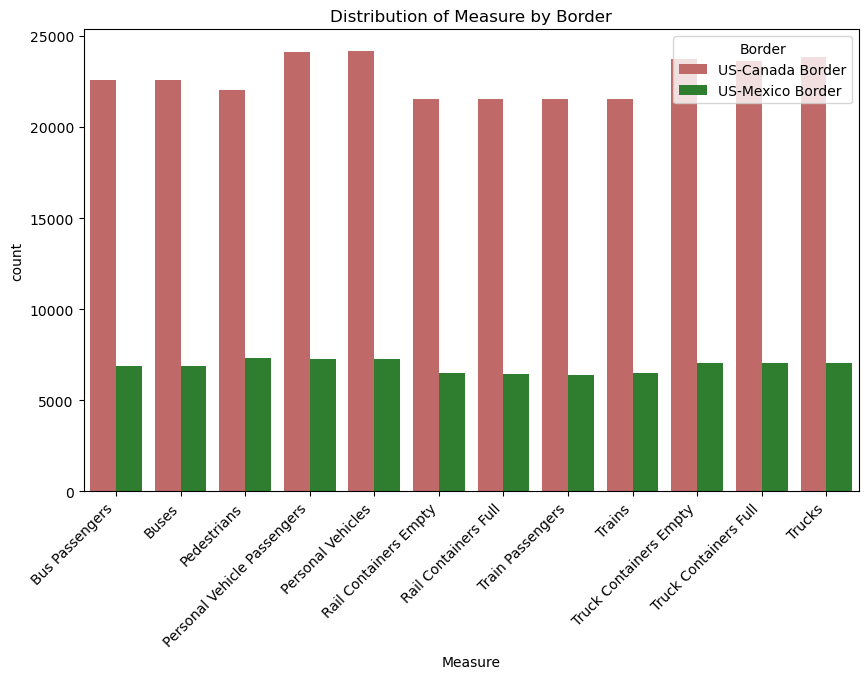

In [74]:
# Define the colors to use based on the 'Border' column
border_colors = {'US-Canada Border': '#CD5C5A', 'US-Mexico Border': '#228B22'}

# Create a barplot to visualize the distribution of the 'Measure' column
plt.subplots(figsize=(10, 6))
sns.countplot(x='Measure', data=df, hue='Border', palette=border_colors)
plt.title('Distribution of Measure by Border')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Shift the x-axis labels to the left
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')

# Show the plot
plt.show()

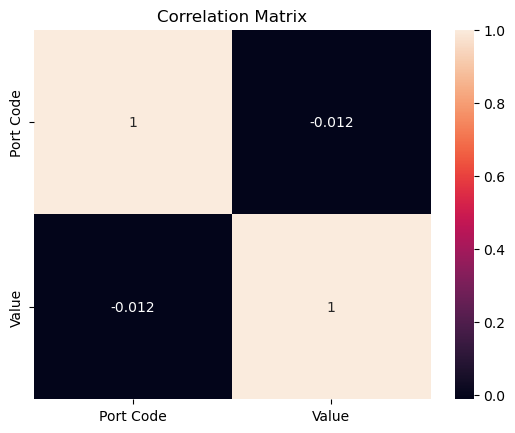

In [47]:
# Create a correlation matrix of the numeric columns in the DataFrame
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

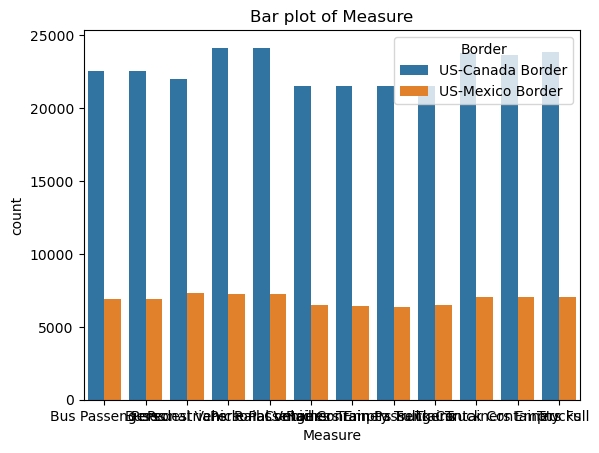

In [75]:
# Create a bar plot of the 'Measure' column
sns.countplot(x='Measure', data=df, hue='Border')
plt.title('Bar plot of Measure')
plt.show()